In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics.pairwise import cosine_similarity

# Sample data
df = pd.read_csv("/content/final_thesis.csv")

y = df.iloc[:,0].values
X = df.iloc[:,1:].values

In [2]:
X

array([[0.29117546, 0.39539755, 0.40893838, ..., 0.07861664, 0.25746754,
        0.63266763],
       [0.45326404, 0.41703597, 0.5778368 , ..., 0.36186182, 0.87723316,
        0.65984772],
       [0.49084617, 0.51334821, 0.47580716, ..., 0.01262755, 0.00807019,
        0.55087277],
       ...,
       [0.31590807, 0.49567335, 0.47843449, ..., 0.05976974, 0.06517357,
        0.70109058],
       [0.46859485, 0.47522526, 0.58417097, ..., 0.95567994, 0.75176157,
        0.45459524],
       [0.23738641, 0.43605002, 0.31461774, ..., 0.0036372 , 0.27598271,
        0.63949371]])

In [3]:
y
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.18384104, 0.18791303, 0.37283498, ..., 0.08004277, 0.28817114,
        0.66604383],
       [0.45456683, 0.27781586, 0.67463866, ..., 0.36849695, 0.98194982,
        0.69466111],
       [0.51733778, 0.67797182, 0.49232244, ..., 0.01284012, 0.00899051,
        0.57992391],
       ...,
       [0.22515028, 0.60453668, 0.4970172 , ..., 0.06084927, 0.07291323,
        0.73808476],
       [0.48017288, 0.51957944, 0.68595716, ..., 0.97323562, 0.84149428,
        0.47855553],
       [0.09400076, 0.356815  , 0.20429392, ..., 0.00368443, 0.30889742,
        0.67323084]])

In [4]:
# KNN graph
import networkx as nx
knn_graph = kneighbors_graph(X, n_neighbors=2, mode='connectivity', include_self=False)

# Cosine similarity (can use other similarity metrics)
cos_sim = cosine_similarity(X)

# Create networkx graph
import numpy as np

adj = knn_graph.toarray()
G = nx.from_numpy_array(adj)

# Add edge weights
for i, j in G.edges():
    G[i][j]['weight'] = cos_sim[i, j]

print(G.nodes())
print(G.edges(data=True)) # view edges with weights

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [7]:
import torch
from torch_geometric.nn import GCNConv
from torch_geometric.utils import add_self_loops
num_nodes = X.shape[0]

num_nodes = X.shape[0]
edge_index = torch.zeros(2, num_nodes, dtype=torch.long)
edge_index[0] = torch.arange(num_nodes)
edge_index[1] = torch.arange(num_nodes)

edges = list(G.edges())
num_edges = len(edges)
graph_edges = torch.zeros(2, num_edges, dtype=torch.long)
graph_edges[0] = torch.from_numpy(np.array(edges)[:,0])
graph_edges[1] = torch.from_numpy(np.array(edges)[:,1])

edge_index = torch.cat([edge_index, graph_edges], dim=-1)

In [6]:
pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00


In [8]:
print("Nodes:", G.number_of_nodes())

Nodes: 585


In [9]:
print("Edges:", G.number_of_edges())

Edges: 873


In [10]:
if G.is_directed():
    print("Directed graph")
else:
    print("Undirected graph")

Undirected graph


In [11]:
density = nx.density(G)
print("Density:", density)

Density: 0.005110642781875658


In [12]:
deg = nx.degree_histogram(G)
print("Degree distribution:")
print(deg)

Degree distribution:
[0, 0, 301, 137, 81, 30, 12, 13, 6, 3, 1, 1]


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [14]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class TabularGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(TabularGNN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)  # Added hidden layer
        self.conv3 = GCNConv(hidden_channels, out_channels)     # Added additional layer

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, training=self.training)

        x = self.conv2(x, edge_index)  # Apply the second layer
        x = x.relu()
        x = F.dropout(x, training=self.training)

        x = self.conv3(x, edge_index)  # Apply the additional layer
        return x.log_softmax(dim=1)


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = torch.from_numpy(y_encoded).long()
y

tensor([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [16]:
model = TabularGNN(X.shape[1], 64, int(y.max()) + 1)


optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()
model

TabularGNN(
  (conv1): GCNConv(19, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 2)
)

In [18]:
y_np = df['Class'].values
x = torch.from_numpy(X)

In [19]:
# Cast inputs to double
x = x.double()
edge_index = edge_index.long()

# Cast model parameters
model.double()

TabularGNN(
  (conv1): GCNConv(19, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 2)
)

In [20]:

for epoch in range(200):
    out = model(x, edge_index)
    loss = criterion(out, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Test accuracy
_, pred = model(x, edge_index).max(dim=1)
acc = pred.eq(y).sum().item() / len(y)
print('Test accuracy: ', acc)

Test accuracy:  0.9914529914529915


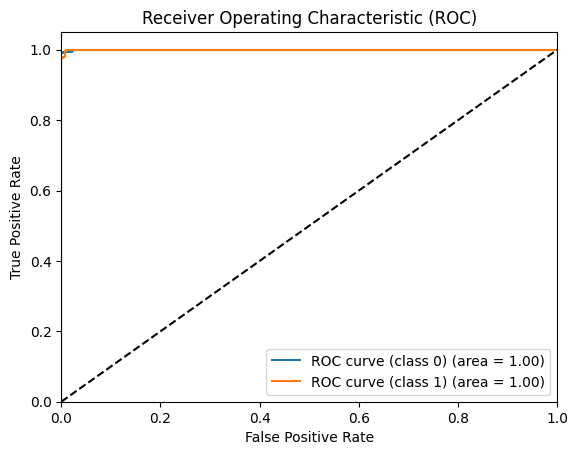

Confusion Matrix:
[[296   4]
 [  1 284]]


In [21]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Assuming `out` contains the model's predictions (logits) for each class
# and `y` contains the true labels (ground truth)

# Calculate the probabilities using softmax
probabilities = np.exp(out.detach().numpy()) / np.exp(out.detach().numpy()).sum(axis=1, keepdims=True)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y == i).float(), probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Create a confusion matrix
conf_matrix = confusion_matrix(y, pred)
print('Confusion Matrix:')
print(conf_matrix)


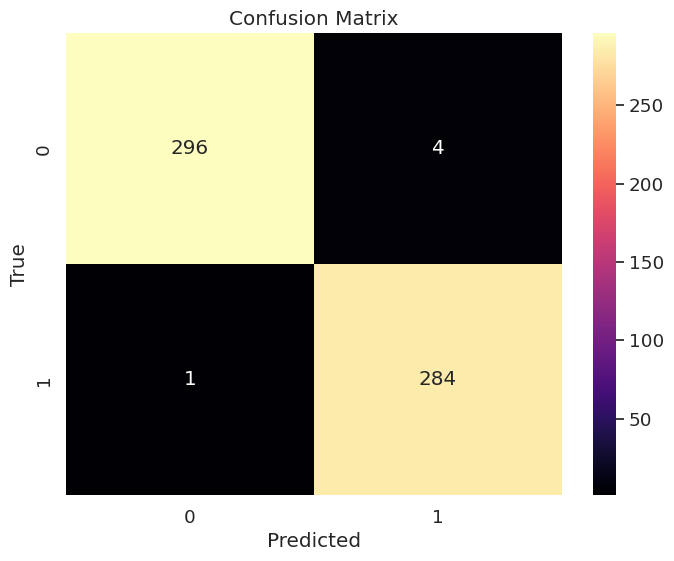

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming `y` contains the true labels (ground truth) and `pred` contains the model's predicted labels

# Create the confusion matrix
conf_matrix = confusion_matrix(y, pred)

# Plot the confusion matrix as a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="magma",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
